In [92]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import dtale 
from pandas_profiling import profile_report
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,StackingRegressor


In [6]:
train_data = pd.read_csv('train_data.csv')
train_data.shape

(1559, 12)

In [7]:
train_data.head()

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
0,Jordan,2008,9.343,0.766,64.22,NaN,-0.127,0.709,0.669,0.331,862,4.930
1,Estonia,2013,10.299,0.901,67.48,0.754,-0.201,0.726,0.702,0.199,534,5.367
2,Sweden,2018,10.881,0.931,72.60,0.942,0.077,0.263,0.823,0.161,1649,7.375
3,Tajikistan,2006,7.554,0.724,60.64,0.702,-0.088,0.768,0.566,0.195,1682,4.613
4,Kuwait,2014,10.945,NaN,65.80,NaN,NaN,NaN,NaN,NaN,925,6.180


In [8]:
train_data.tail()

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
1554,Moldova,2013,9.192,0.803,62.260,0.658,-0.069,0.941,0.582,0.261,1130,5.756
1555,North Macedonia,2015,9.613,0.766,65.145,0.660,-0.047,0.824,0.620,0.299,1294,4.976
1556,Jordan,2005,9.246,0.920,63.500,NaN,NaN,0.670,0.696,0.240,860,6.295
1557,Rwanda,2012,7.428,0.637,57.440,0.835,-0.012,0.081,0.703,0.132,1459,3.333
1558,Moldova,2009,8.984,0.856,61.120,0.551,-0.099,0.925,0.562,0.306,1126,5.554


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1559 non-null   object 
 1   year                              1559 non-null   int64  
 2   Log GDP per capita                1533 non-null   float64
 3   Social support                    1549 non-null   float64
 4   Healthy life expectancy at birth  1522 non-null   float64
 5   Freedom to make life choices      1537 non-null   float64
 6   Generosity                        1488 non-null   float64
 7   Perceptions of corruption         1473 non-null   float64
 8   Positive affect                   1542 non-null   float64
 9   Negative affect                   1545 non-null   float64
 10  ID                                1559 non-null   int64  
 11  Life Ladder                       1559 non-null   float64
dtypes: flo

In [12]:
train_data.isnull().sum()/len(train_data)*100

Country name                        0.000000
year                                0.000000
Log GDP per capita                  1.667736
Social support                      0.641437
Healthy life expectancy at birth    2.373316
Freedom to make life choices        1.411161
Generosity                          4.554201
Perceptions of corruption           5.516357
Positive affect                     1.090443
Negative affect                     0.898012
ID                                  0.000000
Life Ladder                         0.000000
dtype: float64

In [188]:
test_data=pd.read_csv('test_data.csv')
test_data.shape

(390, 11)

In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      390 non-null    object 
 1   year                              390 non-null    int64  
 2   Log GDP per capita                380 non-null    float64
 3   Social support                    387 non-null    float64
 4   Healthy life expectancy at birth  372 non-null    float64
 5   Freedom to make life choices      380 non-null    float64
 6   Generosity                        372 non-null    float64
 7   Perceptions of corruption         366 non-null    float64
 8   Positive affect                   385 non-null    float64
 9   Negative affect                   388 non-null    float64
 10  ID                                390 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 33.6+ KB


In [15]:
test_data.isnull().sum()

Country name                         0
year                                 0
Log GDP per capita                  10
Social support                       3
Healthy life expectancy at birth    18
Freedom to make life choices        10
Generosity                          18
Perceptions of corruption           24
Positive affect                      5
Negative affect                      2
ID                                   0
dtype: int64

In [16]:
d = dtale.show(train_data)
d.open_browser()

In [17]:
train_data.describe()

,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
count,1559.000000,1533.000000,1549.000000,1522.000000,1537.000000,1488.000000,1473.000000,1542.000000,1545.000000,1559.000000,1559.000000
mean,2013.131495,9.362995,0.812689,63.331680,0.741882,0.000343,0.748248,0.708551,0.267644,974.962797,5.469321
std,4.206026,1.160240,0.118762,7.478307,0.142326,0.163385,0.186708,0.108029,0.084431,562.023107,1.113280
min,2005.000000,6.635000,0.290000,32.300000,0.260000,-0.335000,0.035000,0.322000,0.083000,0.000000,2.375000
25%,2010.000000,8.460000,0.753000,58.340000,0.646000,-0.113000,0.691000,0.623000,0.206000,494.500000,4.649500
50%,2013.000000,9.456000,0.835000,65.180000,0.763000,-0.025000,0.804000,0.721000,0.258000,973.000000,5.374000
75%,2017.000000,10.332000,0.905000,68.535000,0.855000,0.091000,0.873000,0.798000,0.319000,1459.500000,6.272500
max,2020.000000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000,1948.000000,8.019000


In [18]:
# Missing Values_imputation

In [32]:
MissingCols = train_data[train_data.columns[train_data.isnull().sum()>0]].columns

In [33]:
MissingCols

Index(['Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

In [36]:
for i in MissingCols:
    train_data[i].fillna(train_data[i].median(),inplace=True)
    

In [37]:
train_data.isnull().sum()

Country name                        0
year                                0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
ID                                  0
Life Ladder                         0
dtype: int64

In [38]:
# Using Dtale Again after missing values imputed
d1 = dtale.show(train_data)
d1.open_browser()

In [40]:
# EDA- Describing the Target Variable and it's coorelation with other Variables

train_data['Life Ladder'].describe()
# Score Range is from 2.37 to 8.01. 50% of the people are below 5.37 Score



count    1559.000000
mean        5.469321
std         1.113280
min         2.375000
25%         4.649500
50%         5.374000
75%         6.272500
max         8.019000
Name: Life Ladder, dtype: float64

<AxesSubplot:>

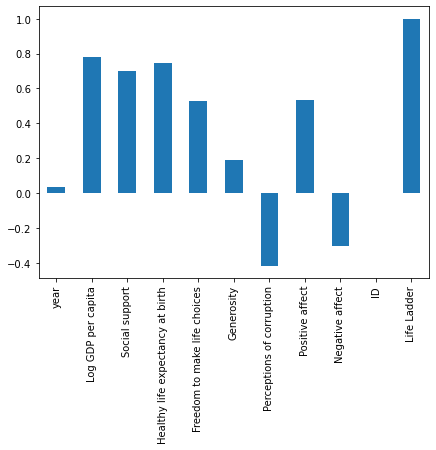

In [52]:
plt.figure(figsize=(7,5))
train_data.corr()['Life Ladder'].plot(kind='bar')

# Highest Coorelation of Target Variable is with LOG GDP Per Capita,Healthy Life expectancy. Lower Correlation with Genorisity.
# Negative Coorelation with Perception of corruption, Negative effect

<AxesSubplot:xlabel='Life Ladder', ylabel='Perceptions of corruption'>

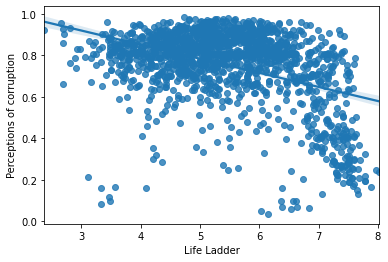

In [60]:
sns.regplot(data=train_data,x='Life Ladder',y='Perceptions of corruption')

<AxesSubplot:xlabel='Country name', ylabel='count'>

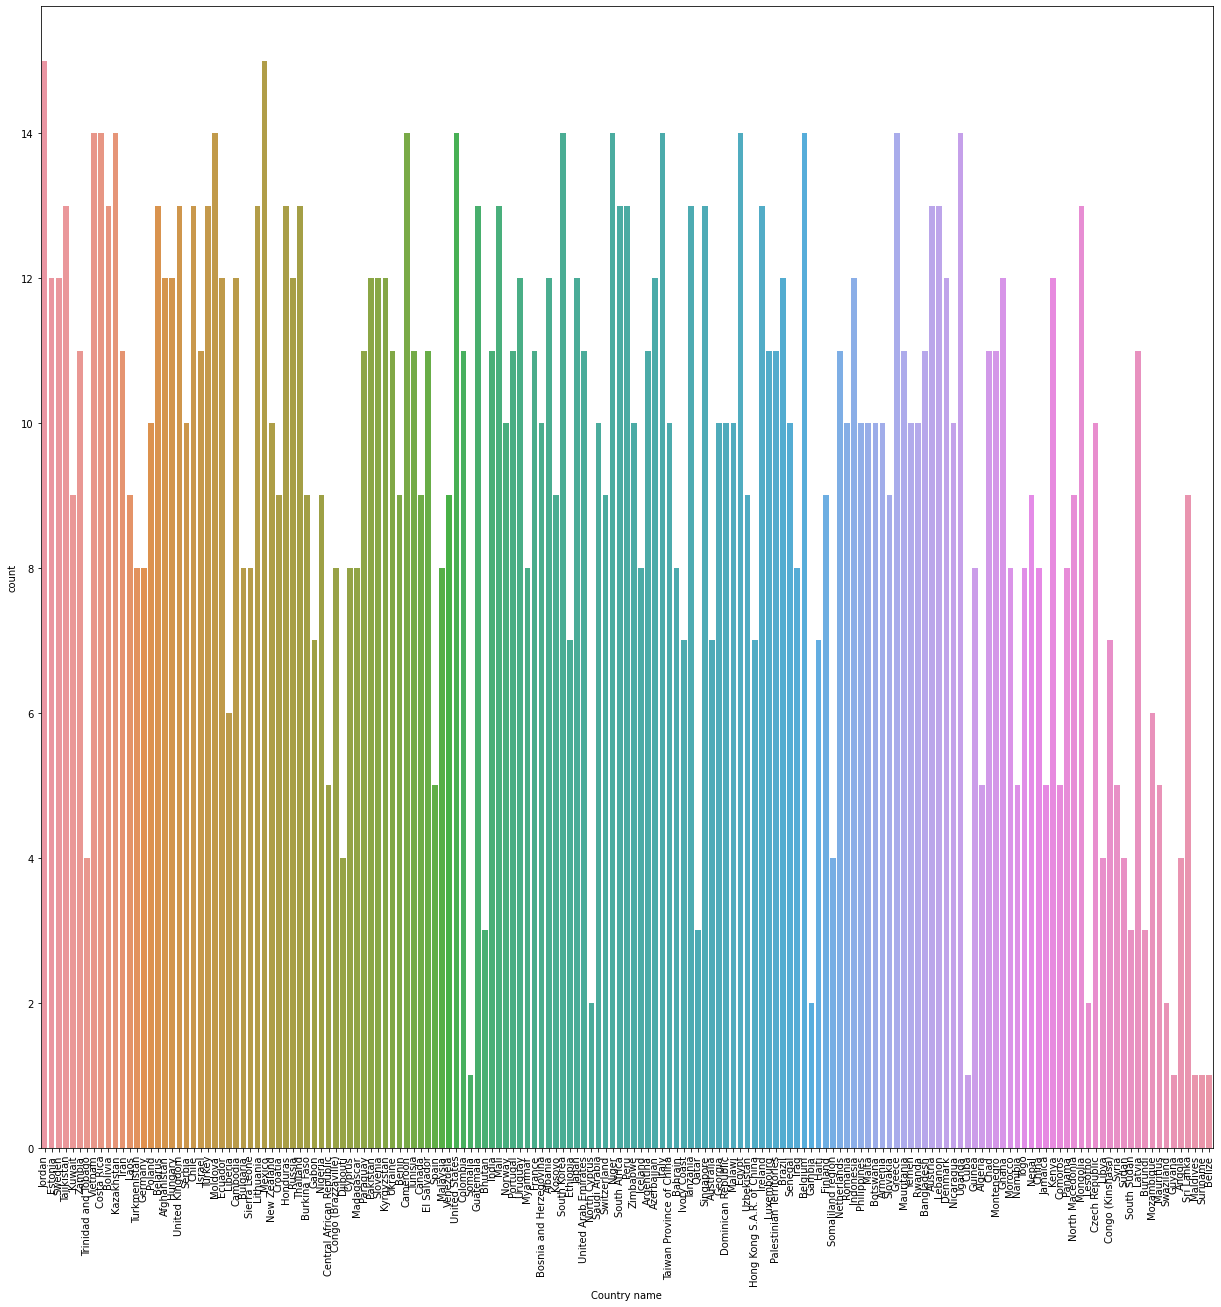

In [68]:
plt.figure(figsize=(21,21))
plt.xticks(rotation=90)
sns.countplot(train_data['Country name'])

<AxesSubplot:xlabel='Country name'>

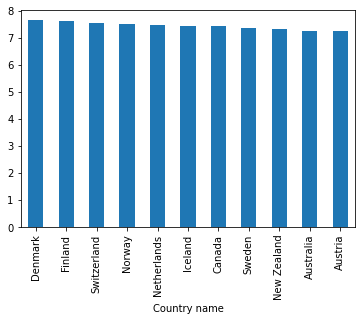

In [79]:
#Country with Good Life Ladder Score and Low Life Ladder Scores
#Top 10 Countries with Good Life Ladder Score
train_data.groupby(by=['Country name']).mean()['Life Ladder'].sort_values(ascending=False)[:11].plot(kind='bar')

<AxesSubplot:xlabel='Country name'>

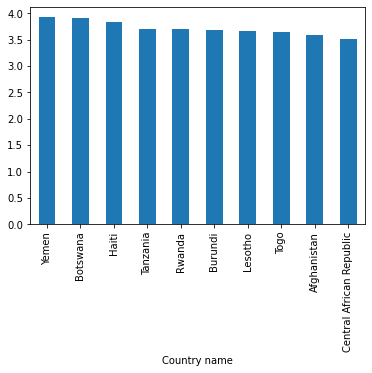

In [142]:
#Bottom 10 Countries with Bad Life Ladder Score
train_data.groupby(by=['Country name']).mean()['Life Ladder'].sort_values(ascending=False)[-11:-1].plot(kind='bar')

In [143]:
# Working on Modelling Part
X = train_data.drop(['Country name','ID','Life Ladder','year'],axis=1)
y = train_data['Life Ladder']
print(X.shape)
print(y.shape)

(1559, 8)
(1559,)


In [144]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1247, 8) (1247,) (312, 8) (312,)


In [163]:
SS = StandardScaler()
X_train[X_train.columns] = SS.fit_transform(X_train)
X_test[X_test.columns] = SS.transform(X_test)
print(X_train.head())
print(X_test.head())

      Log GDP per capita  Social support  ...  Positive affect  Negative affect
844             1.044545        0.705118  ...         0.064189         1.063411
923             0.955002        0.817281  ...         0.389114        -0.722964
1237            0.521194        0.765513  ...        -0.130767        -1.342240
774             0.136940       -0.252583  ...        -1.086977        -0.818237
1258           -0.473347        0.851793  ...         1.261772        -0.556235

[5 rows x 8 columns]
      Log GDP per capita  Social support  ...  Positive affect  Negative affect
1524            0.068261       -1.538146  ...        -0.372140         0.801409
1483           -0.389020        0.040766  ...         1.038966         0.277406
354             1.414890        0.627466  ...         1.038966        -2.044881
668            -0.068228       -0.330235  ...         1.178220        -1.485150
1422           -2.188582        0.118418  ...        -1.114828        -0.949238

[5 rows x 8 colum

## Model 1 - Linear Regression

In [164]:
LR = LinearRegression()
LR.fit(X_train,y_train)
LR_Train = LR.predict(X_train)
LR_Test = LR.predict(X_test)
print(r2_score(y_train,LR_Train))
print(r2_score(y_test,LR_Test))
LR_CV = cross_val_score(estimator=LinearRegression(),cv=10,X=X_train,y=y_train)
print(LR_CV.mean())

0.7747362093897262
0.6932480171321034
0.7690008150206628


## Model 2 - Decision Tree

In [147]:
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)
DT_Train = DT.predict(X_train)
DT_Test = DT.predict(X_test)
print(r2_score(y_train,DT_Train))
print(r2_score(y_test,DT_Test))
DT_CV = cross_val_score(estimator=DecisionTreeRegressor(),cv=10,X=X_train,y=y_train)
print(DT_CV.mean())

1.0
0.6895282730308702
0.7134494757596034


## 2.1 - Model using DecisionTree Regression using GridSearchCV

In [166]:
GSV= GridSearchCV(estimator=DecisionTreeRegressor(),cv=10,param_grid=dict(max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]))
GSV.fit(X_train,y_train)
print(GSV.best_params_)
DT = DecisionTreeRegressor(max_depth=6)
DT.fit(X_train,y_train)
DT_Train = DT.predict(X_train)
DT_Test = DT.predict(X_test)
print(r2_score(y_train,DT_Train))
print(r2_score(y_test,DT_Test))
DT_CV = cross_val_score(estimator=DecisionTreeRegressor(max_depth=6),cv=10,X=X_train,y=y_train)
print(DT_CV.mean())


{'max_depth': 6}
0.8689939789723415
0.7269907638790614
0.7776743688245565


## Model 3 - Random Forest Regressor

In [167]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
RF_Train = RF.predict(X_train)
RF_Test = RF.predict(X_test)
print(r2_score(y_train,RF_Train))
print(r2_score(y_test,RF_Test))
RF_CV = cross_val_score(estimator=RandomForestRegressor(),cv=10,X=X_train,y=y_train)
print(RF_CV.mean())

0.9803013137950674
0.8226485010745528
0.860300773793532


## Model 3.1 - Random Forest Regressor using GSV

In [189]:
GSV= GridSearchCV(estimator=RandomForestRegressor(random_state=42),cv=10,param_grid=dict(n_estimators = np.arange(1,100,10)),)
GSV.fit(X_train,y_train)
print(GSV.best_params_)
RF = RandomForestRegressor(n_estimators=91)
RF.fit(X_train,y_train)
RF_Train = RF.predict(X_train)
RF_Test = RF.predict(X_test)
print(r2_score(y_train,RF_Train))
print(r2_score(y_test,RF_Test))
RF_CV = cross_val_score(estimator=RandomForestRegressor(n_estimators=91),cv=10,X=X_train,y=y_train)
print(RF_CV.mean())

{'n_estimators': 91}
0.9803157654457267
0.8186806496563016
0.8590299173940208


## Model 4 -  Gradient boosting regressor

In [151]:
GB = GradientBoostingRegressor()
GB.fit(X_train,y_train)
GB_Train = GB.predict(X_train)
GB_Test = GB.predict(X_test)
print(r2_score(y_train,GB_Train))
print(r2_score(y_test,GB_Test))
GB_CV = cross_val_score(estimator=GradientBoostingRegressor(),cv=10,X=X_train,y=y_train)
print(GB_CV.mean())

0.8999597523159544
0.7714021901655854
0.8344071591271585


## Model 4.1 -  Gradient boosting regressor

In [152]:
GSV= GridSearchCV(estimator=GradientBoostingRegressor(),cv=10,param_grid=dict(n_estimators = np.arange(1,100,10)))
GSV.fit(X_train,y_train)
print(GSV.best_params_)
GB = GradientBoostingRegressor(n_estimators=91)
GB.fit(X_train,y_train)
GB_Train = GB.predict(X_train)
GB_Test = GB.predict(X_test)
print(r2_score(y_train,GB_Train))
print(r2_score(y_test,GB_Test))
GB_CV = cross_val_score(estimator=GradientBoostingRegressor(n_estimators=91),cv=10,X=X_train,y=y_train)
print(GB_CV.mean())

{'n_estimators': 91}
0.8967164161254498
0.77097945194246
0.834118042827612


## Model 5 - Adaboosting Regressor

In [153]:
GSV= GridSearchCV(estimator=AdaBoostRegressor(),cv=10,param_grid=dict(n_estimators = np.arange(1,100,10)))
GSV.fit(X_train,y_train)
print(GSV.best_params_)
AB = AdaBoostRegressor()
AB.fit(X_train,y_train)
AB_Train = AB.predict(X_train)
AB_Test = AB.predict(X_test)
print(r2_score(y_train,AB_Train))
print(r2_score(y_test,AB_Test))
AB_CV = cross_val_score(estimator=AdaBoostRegressor(),cv=10,X=X_train,y=y_train)
print(AB_CV.mean())

{'n_estimators': 71}
0.8314442090179994
0.742827333305958
0.804296671225979


## From all the Models, RF with N-Estimators = 91 Shows promising results

In [190]:
test_data.isnull().sum()

Country name                         0
year                                 0
Log GDP per capita                  10
Social support                       3
Healthy life expectancy at birth    18
Freedom to make life choices        10
Generosity                          18
Perceptions of corruption           24
Positive affect                      5
Negative affect                      2
ID                                   0
dtype: int64

In [191]:
MissingCols

Index(['Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

In [192]:
for i in MissingCols:
    test_data[i].fillna(test_data[i].median(),inplace=True)

In [193]:
X1 = test_data.drop(['Country name','ID','year'],axis=1)

In [199]:
X1

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,10.488,0.935,75.00,0.783,-0.1210,0.730,0.686,0.317
1,10.314,0.882,68.90,0.831,-0.1220,0.639,0.677,0.203
2,9.800,0.713,65.36,0.621,-0.0060,0.856,0.499,0.339
3,9.966,0.770,65.76,0.840,-0.0160,0.842,0.887,0.155
4,10.730,0.931,74.00,0.887,0.0500,0.434,0.796,0.307
...,...,...,...,...,...,...,...,...
385,10.890,0.920,72.20,0.877,0.0340,0.496,0.780,0.243
386,10.551,0.822,72.40,0.755,0.0730,0.833,0.786,0.296
387,10.336,0.936,67.10,0.698,-0.1940,0.789,0.575,0.212
388,10.532,0.902,73.80,0.772,-0.1400,0.770,0.827,0.188


In [202]:
X1[X1.columns] = StandardScaler().fit_transform(X1)

In [203]:
X1

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,0.982418,1.050397,1.532300,0.266651,-0.772451,-0.087969,-0.292244,0.512276
1,0.826257,0.597097,0.715629,0.611145,-0.778950,-0.588855,-0.380105,-0.787192
2,0.364955,-0.848331,0.241693,-0.896014,-0.025127,0.605566,-2.117798,0.763050
3,0.513936,-0.360820,0.295245,0.675737,-0.090112,0.528506,1.669983,-1.334337
4,1.199607,1.016186,1.398419,1.013053,0.338787,-1.717225,0.781612,0.398287
...,...,...,...,...,...,...,...,...
385,1.343203,0.922105,1.157435,0.941284,0.234811,-1.375962,0.625414,-0.331239
386,1.038959,0.083927,1.184211,0.065697,0.488252,0.478968,0.683988,0.272900
387,0.846002,1.058950,0.474645,-0.343389,-1.246839,0.236781,-1.375862,-0.684603
388,1.021907,0.768154,1.371643,0.187705,-0.895922,0.132201,1.084244,-0.958175


In [204]:
X1.shape

(390, 8)

In [205]:
RF_final = RandomForestRegressor(n_estimators=91)
RF_final.fit(X_train,y_train)
RF
OP = RF_final.predict(X1)

In [212]:
Final = pd.DataFrame(test_data['ID'])
Final['Output'] = OP
Final.to_csv('submission.csv',index=False,header=False)
